# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [ ]:
# write yout code

In [970]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten



mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Original Dataset:",X_train.shape, y_train.shape, X_test.shape, y_test.shape)



Original Dataset: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [971]:
train_images_subset = X_train[:1000]
train_labels_subset = y_train[:1000]
test_images_subset = X_test[:100]
test_labels_subset = y_test[:100]


print("After Slicing: ", train_images_subset.shape, train_labels_subset.shape, test_images_subset.shape, test_labels_subset.shape)

After Slicing:  (1000, 28, 28) (1000,) (100, 28, 28) (100,)


In [972]:
train_images_subset = train_images_subset.reshape([-1, 28, 28, 1])
test_images_subset = test_images_subset.reshape([-1, 28, 28, 1])


train_labels_subset = pd.get_dummies(train_labels_subset)
test_labels_subset = pd.get_dummies(test_labels_subset)


print("After Reshaping and Encoding", train_images_subset.shape,train_labels_subset.shape, test_images_subset.shape, test_labels_subset.shape)



After Reshaping and Encoding (1000, 28, 28, 1) (1000, 10) (100, 28, 28, 1) (100, 10)


In [973]:
train_images_subset.dtype

dtype('uint8')

In [974]:
train_images_subset = tf.cast(train_images_subset, tf.float32)
train_labels_subset = tf.cast(train_labels_subset, tf.float32)
train_images_subset.shape

TensorShape([1000, 28, 28, 1])

In [975]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['Accuracy'])

In [976]:
history = model.fit(train_images_subset, train_labels_subset, validation_data = (test_images_subset, test_labels_subset), epochs = 7)



Epoch 1/7
32/32 [==============================] - 2s 46ms/step - loss: 7.4072 - Accuracy: 0.5640 - val_loss: 1.3166 - val_Accuracy: 0.7600
Epoch 2/7
32/32 [==============================] - 1s 42ms/step - loss: 0.6309 - Accuracy: 0.8630 - val_loss: 0.7727 - val_Accuracy: 0.7800
Epoch 3/7
32/32 [==============================] - 1s 43ms/step - loss: 0.2657 - Accuracy: 0.9390 - val_loss: 0.5224 - val_Accuracy: 0.9000
Epoch 4/7
32/32 [==============================] - 1s 42ms/step - loss: 0.1424 - Accuracy: 0.9620 - val_loss: 0.3244 - val_Accuracy: 0.9000
Epoch 5/7
32/32 [==============================] - 1s 41ms/step - loss: 0.0467 - Accuracy: 0.9880 - val_loss: 0.2878 - val_Accuracy: 0.9000
Epoch 6/7
32/32 [==============================] - 1s 42ms/step - loss: 0.0160 - Accuracy: 0.9970 - val_loss: 0.2450 - val_Accuracy: 0.9300
Epoch 7/7
32/32 [==============================] - 2s 49ms/step - loss: 0.0084 - Accuracy: 0.9990 - val_loss: 0.2807 - val_Accuracy: 0.9200


In [977]:
score = model.evaluate(test_images_subset, test_labels_subset, verbose=0)
print('loss=', score[0]*100)
print('accuracy=', score[1]*100)

loss= 28.071284294128418
accuracy= 92.00000166893005


# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [978]:
# Example
import tensorflow as tf
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Input, Dense, Activation,Conv2D,MaxPooling2D,Dropout,Flatten,Reshape,UpSampling2D,Conv2DTranspose
fashion_mnist = tf.keras.datasets.fashion_mnist



In [979]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Original Dataset:",X_train.shape, y_train.shape, X_test.shape, y_test.shape)

train_images_subset = X_train[:1000]
train_labels_subset = y_train[:1000]
test_images_subset = X_test[:100]
test_labels_subset = y_test[:100]


print("After Slicing: ", train_images_subset.shape, train_labels_subset.shape, test_images_subset.shape, test_labels_subset.shape)


train_labels_subset = pd.get_dummies(train_labels_subset)
test_labels_subset = pd.get_dummies(test_labels_subset)


print("After Reshaping and Encoding", train_images_subset.shape,train_labels_subset.shape, test_images_subset.shape, test_labels_subset.shape)



Original Dataset: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
After Slicing:  (1000, 28, 28) (1000,) (100, 28, 28) (100,)
After Reshaping and Encoding (1000, 28, 28) (1000, 10) (100, 28, 28) (100, 10)


In [980]:
train_images = train_images_subset.astype('float32') / 255.
test_images = test_images_subset.astype('float32') / 255.

In [981]:
# Encoder
input = Input(shape = (28, 28))
encode = Dense(128, activation = 'relu')(input)
encode = Dense(64, activation = 'relu')(encode)
encode = Dense(32, activation = 'relu')(encode)
# Decoder
decode = Dense(64, activation = 'relu')(encode)
decode = Dense(128, activation = 'relu')(decode)
decode = Dense(28, activation = 'sigmoid')(decode)
# Autoencoder
model2 = Model(input, decode)
model2.summary()
model2.compile(optimizer = "adam", loss = "mse",  metrics = ['Accuracy'])

Model: "model_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_225 (InputLayer)       [(None, 28, 28)]          0         
_________________________________________________________________
dense_478 (Dense)            (None, 28, 128)           3712      
_________________________________________________________________
dense_479 (Dense)            (None, 28, 64)            8256      
_________________________________________________________________
dense_480 (Dense)            (None, 28, 32)            2080      
_________________________________________________________________
dense_481 (Dense)            (None, 28, 64)            2112      
_________________________________________________________________
dense_482 (Dense)            (None, 28, 128)           8320      
_________________________________________________________________
dense_483 (Dense)            (None, 28, 28)            36

In [982]:
history = model2.fit(x = train_images, y = train_images, epochs = 100,shuffle=True, validation_data = (test_images, test_images))

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1315 - Accuracy: 0.0488 - val_loss: 0.0824 - val_Accuracy: 0.0514
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0516 - Accuracy: 0.0584 - val_loss: 0.0298 - val_Accuracy: 0.0607
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0259 - Accuracy: 0.0671 - val_loss: 0.0210 - val_Accuracy: 0.0811
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 0.0193 - Accuracy: 0.0862 - val_loss: 0.0180 - val_Accuracy: 0.0864
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0168 - Accuracy: 0.0892 - val_loss: 0.0159 - val_Accuracy: 0.0921
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0147 - Accuracy: 0.0972 - val_loss: 0.0142 - val_Accuracy: 0.1079
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0126 - Accuracy: 0.1076 - val_loss: 0.0120 - val_Accuracy: 0.1175
Epoch 8/

32/32 [==============================] - 0s 9ms/step - loss: 0.0021 - Accuracy: 0.4390 - val_loss: 0.0024 - val_Accuracy: 0.4307
Epoch 59/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0021 - Accuracy: 0.4449 - val_loss: 0.0025 - val_Accuracy: 0.4436
Epoch 60/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0021 - Accuracy: 0.4489 - val_loss: 0.0026 - val_Accuracy: 0.4368
Epoch 61/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0022 - Accuracy: 0.4529 - val_loss: 0.0024 - val_Accuracy: 0.4264
Epoch 62/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0020 - Accuracy: 0.4564 - val_loss: 0.0023 - val_Accuracy: 0.4443
Epoch 63/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0020 - Accuracy: 0.4619 - val_loss: 0.0023 - val_Accuracy: 0.4386
Epoch 64/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0020 - Accuracy: 0.4574 - val_loss: 0.0023 - val_Accuracy: 0.4461
Epoch 65/100
32/32 


## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [983]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
import matplotlib.pyplot as plt

In [984]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0],784).astype('float32')/255.
y_train=y_train.astype('float32')/255.
print(X_train.shape)


(60000, 784)


In [991]:
#Generic Function to plot Scatter Plot

def plot(model_no,Xtrain,ytrain):
    m=model_no.predict(Xtrain)
    print(m.shape)
    plt.scatter(m[:,1],m[:,0],c=ytrain,cmap='viridis')
    plt.show()
    
def plot_old_new(model_no,Xtest):
    decoded_imgs = model_no.predict(Xtest)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(Xtest[i,:].reshape(28,28))
        plt.title("original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i,:].reshape(28,28))
        plt.title("reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [986]:
# Encoder
input1 = Input(shape=(784,))
x = Dense(2, activation='relu')(input1)
encoder_model_11 = Model(input1,x)

# Decoder
dec_input = Input(shape=(2,))
y =  Dense(784,activation='sigmoid')(dec_input)
decoder_model_11 = Model(dec_input,y)

In [987]:
encoder_model_1 = encoder_model_11(input1)
decoder_model_1 = decoder_model_11(encoder_model_1)

In [988]:
# Autoencoder
model3 = Model(input1, decoder_model_1)
model3.compile(optimizer="adam", loss="mse")
model3.summary()

Model: "model_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_226 (InputLayer)       [(None, 784)]             0         
_________________________________________________________________
model_119 (Functional)       (None, 2)                 1570      
_________________________________________________________________
model_120 (Functional)       (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [989]:
hist = model3.fit(x = X_train, y = X_train, epochs = 5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0703 - val_loss: 0.0590
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0550 - val_loss: 0.0520
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0492 - val_loss: 0.0475
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0460 - val_loss: 0.0454
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0448 - val_loss: 0.0447


(60000, 2)


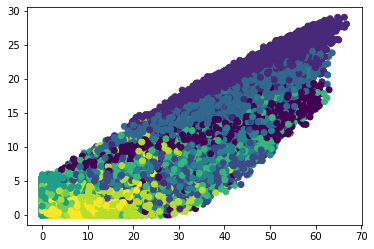

In [990]:
plot(encoder_model_11,X_train,y_train)

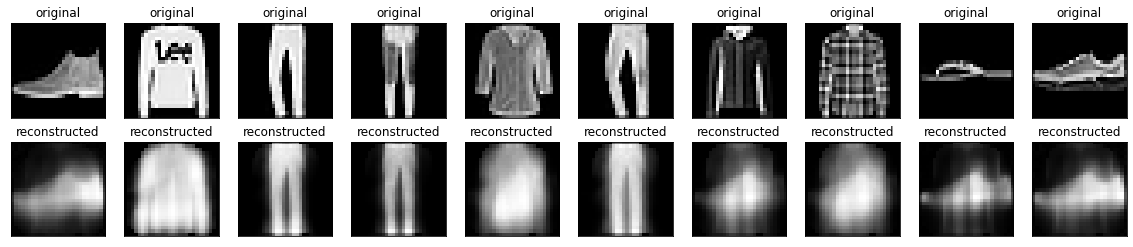

In [992]:
plot_old_new(model3,X_test)


## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [1004]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0],784).astype('float32')/255.
y_train = y_train.astype('float32')/255.
print(X_train.shape)


(60000, 784)


In [1005]:
# Encoder
input1 = Input(shape=(784,))
x = Dense(10, activation='relu')(input1)
x = Dense(2,activation='relu')(x)
encoder_model_22 = Model(input1,x)
# Decoder
dec_input = Input(shape=(2,))
hidden = Dense(10,activation='relu')(dec_input)
y =  Dense(784,activation='sigmoid')(hidden)
decoder_model_22 = Model(dec_input,y)

encoder_model_2 = encoder_model_22(input1)
decoder_model_2 = decoder_model_22(encoder_model_2)
print(input1)
print(decoder_model_2)
# Autoencoder
model4 = Model(input1,decoder_model_2)
model4.compile(optimizer="adam", loss="mse")
model4.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_232'), name='input_232', description="created by layer 'input_232'")
KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), name='model_129/dense_497/Sigmoid:0', description="created by layer 'model_129'")
Model: "model_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_232 (InputLayer)       [(None, 784)]             0         
_________________________________________________________________
model_128 (Functional)       (None, 2)                 7872      
_________________________________________________________________
model_129 (Functional)       (None, 784)               8654      
Total params: 16,526
Trainable params: 16,526
Non-trainable params: 0
_________________________________________________________________


In [1006]:
hist = model4.fit(x = X_train, y = X_train, epochs = 10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0650 - val_loss: 0.0459
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0421 - val_loss: 0.0408
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0392 - val_loss: 0.0392
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0381 - val_loss: 0.0383
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0373 - val_loss: 0.0376
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0368 - val_loss: 0.0371
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0364 - val_loss: 0.0367
Epoch 8/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0359 - val_loss: 0.0362
Epoch 9/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0355 - val_loss: 0.0362
Epoch 10/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.035

(60000, 2)


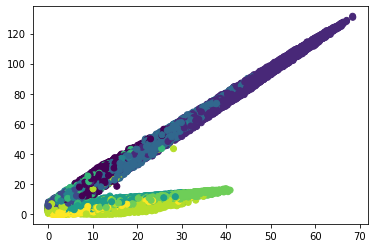

In [1007]:
plot(encoder_model_22,X_train,y_train)

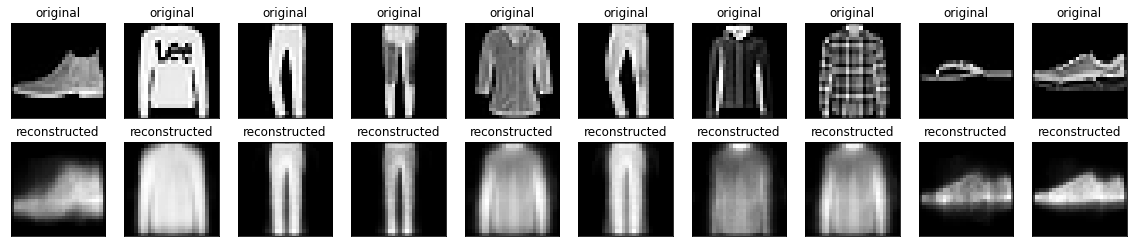

In [1008]:
plot_old_new(model4,X_test)

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [1009]:
#Write your code here

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.
X_test = X_test.reshape(-1,28,28,1).astype('float32')/255.
y_train=y_train.astype('float32')/255.
print(X_train.shape)

(60000, 28, 28, 1)


In [1010]:
input_data = Input(shape=(28, 28, 1))
 
encoder = Conv2D(64, (5,5), activation='relu')(input_data)
encoder = MaxPooling2D((2,2))(encoder)
encoder = Conv2D(64, (3,3), activation='relu')(encoder)
encoder = MaxPooling2D((2,2))(encoder)
encoder = Conv2D(32, (3,3), activation='relu')(encoder)
encoder = MaxPooling2D((2,2))(encoder)
encoder = Flatten()(encoder)
encoder = Dense(2)(encoder)

encoder_model_33 = Model(input_data, encoder)
encoder_model_33.summary()

Model: "model_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_234 (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_244 (Conv2D)          (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 1, 1, 32)          0 

In [1011]:
# Decoder

decoder_input = Input(shape=(2))
decoder_cnn = Dense(64)(decoder_input)
decoder_cnn = Reshape((1, 1, 64))(decoder_cnn)
decoder_cnn = Conv2DTranspose(64, (3,3), activation='relu')(decoder_cnn)
decoder_cnn = Conv2DTranspose(64, (3,3), activation='relu')(decoder_cnn)
decoder_cnn = UpSampling2D((2,2))(decoder_cnn)
decoder_cnn = Conv2DTranspose(64, (3,3), activation='relu')(decoder_cnn)
decoder_cnn = UpSampling2D((2,2))(decoder_cnn)
 
decoder_output = Conv2DTranspose(1, (5,5), activation='sigmoid')(decoder_cnn)
decoder_model_33 = Model(decoder_input, decoder_output)
decoder_model_33.summary()

Model: "model_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_235 (InputLayer)       [(None, 2)]               0         
_________________________________________________________________
dense_499 (Dense)            (None, 64)                192       
_________________________________________________________________
reshape_28 (Reshape)         (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_transpose_80 (Conv2DT (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_transpose_81 (Conv2DT (None, 5, 5, 64)          36928     
_________________________________________________________________
up_sampling2d_24 (UpSampling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_transpose_82 (Conv2DT (None, 12, 12, 64)        36

In [1012]:
encoder_model_3 = encoder_model_33(input_data)
decoder_model_3 = decoder_model_33(encoder_model_3)

In [1013]:
model5 = Model(input_data, decoder_model_3)
model5.compile(optimizer="adam", loss="mse")
model5.summary()

Model: "model_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_234 (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
model_131 (Functional)       (None, 2)                 57122     
_________________________________________________________________
model_132 (Functional)       (None, 28, 28, 1)         112577    
Total params: 169,699
Trainable params: 169,699
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model5.fit(x = X_train, y = X_train, epochs = 5, validation_split=0.1,shuffle=True)

Epoch 1/5
1688/1688 [==============================] - 136s 80ms/step - loss: 0.0403 - val_loss: 0.0325
Epoch 2/5
1688/1688 [==============================] - 131s 78ms/step - loss: 0.0312 - val_loss: 0.0310
Epoch 3/5
1688/1688 [==============================] - 136s 80ms/step - loss: 0.0299 - val_loss: 0.0303
Epoch 4/5
1688/1688 [==============================] - 137s 81ms/step - loss: 0.0293 - val_loss: 0.0296
Epoch 5/5
 756/1688 [============>.................] - ETA: 1:23 - loss: 0.0288

(60000, 2)


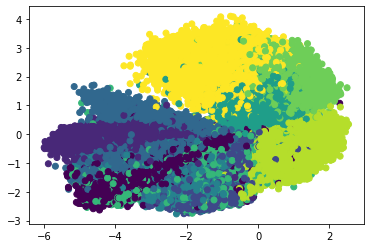

In [969]:
plot(encoder_model_33,X_train,y_train)

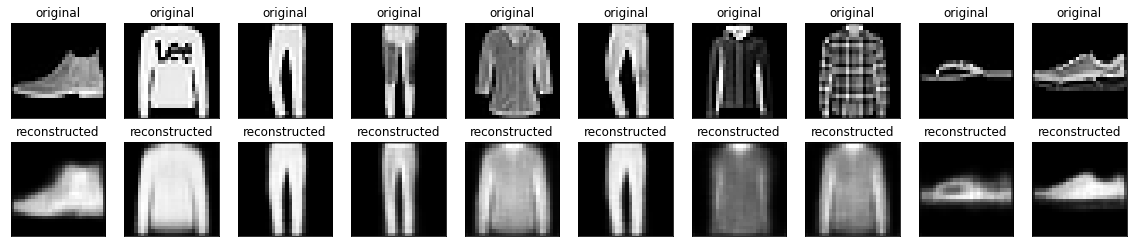

In [963]:
plot_old_new(model5,X_test)


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



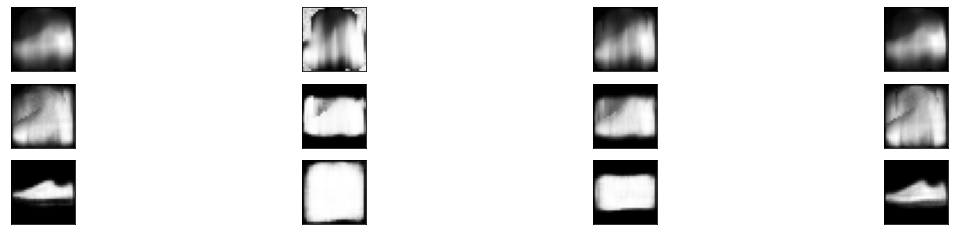

In [967]:
import random

randomlist = []
for i in range(0,4):
    n = round(random.uniform(-5,5),1)
    q = round(random.uniform(-5,5),1)
    randomlist.append([n,q])

plt.figure(figsize=(20, 4))

for i in range(4):
    # Display original
    ax = plt.subplot(3, 4, i + 1)
    digit_decoded = decoder_model_11.predict(randomlist)[i]
    plt.imshow(digit_decoded.reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    
    ax = plt.subplot(3, 4, i + 1 + 4)
    digit_decoded = decoder_model_22.predict(randomlist)[i]
    plt.imshow(digit_decoded.reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    
    ax = plt.subplot(3, 4, i + 1 + 8)
    digit_decoded = decoder_model_33.predict(randomlist)[i]
    plt.imshow(digit_decoded.reshape(28,28), cmap='gray')
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()